In [18]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [19]:
# Load the Iris dataset
iris = load_iris()


In [20]:

# Create a DataFrame for easier manipulation
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [21]:
df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  
1         0  
2         0  
3         0  
4         0  
..      ...  
145       2  
146       2  
147       2  
148       2  
149       2  

[150 rows x 5 columns]

In [22]:
df["target"].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

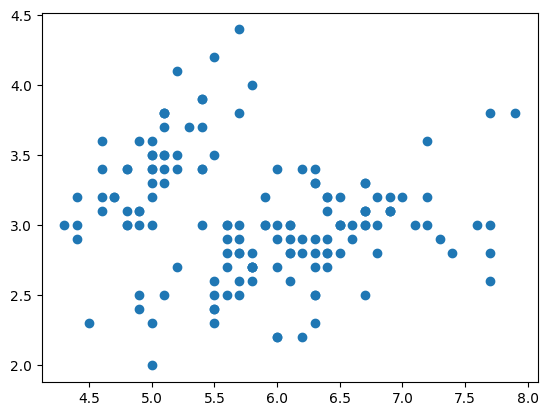

In [23]:
plt.scatter(x=df['sepal length (cm)'], y=df["sepal width (cm)"])

plt.show()

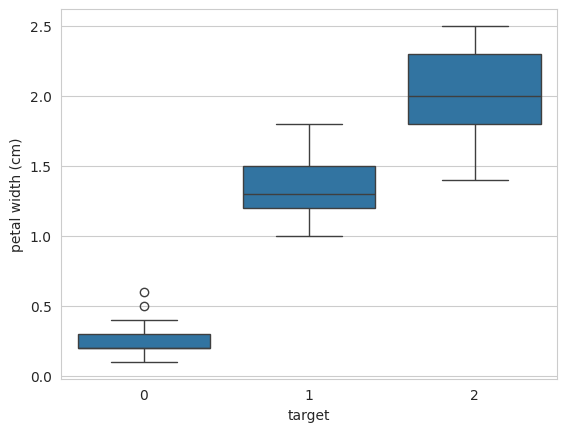

In [24]:
with sns.axes_style("whitegrid"):
    sns.boxplot(data=df,
                x='target',
                y='petal width (cm)')

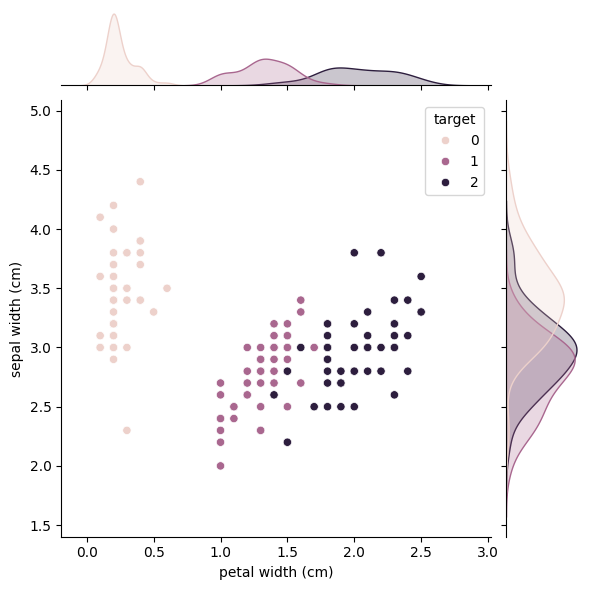

In [25]:
sns.jointplot(data=df, x="petal width (cm)", y="sepal width (cm)", hue="target")

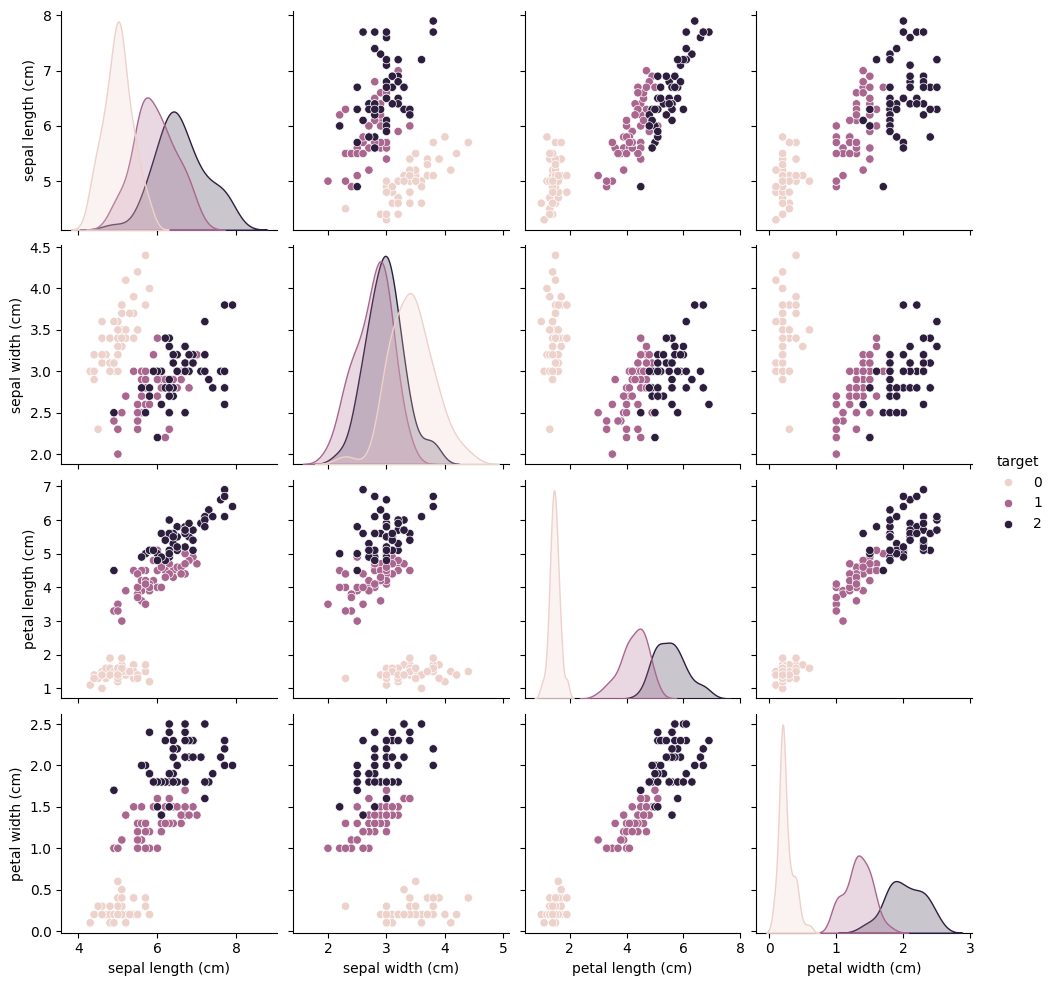

In [26]:
sns.pairplot(data=df, hue="target")

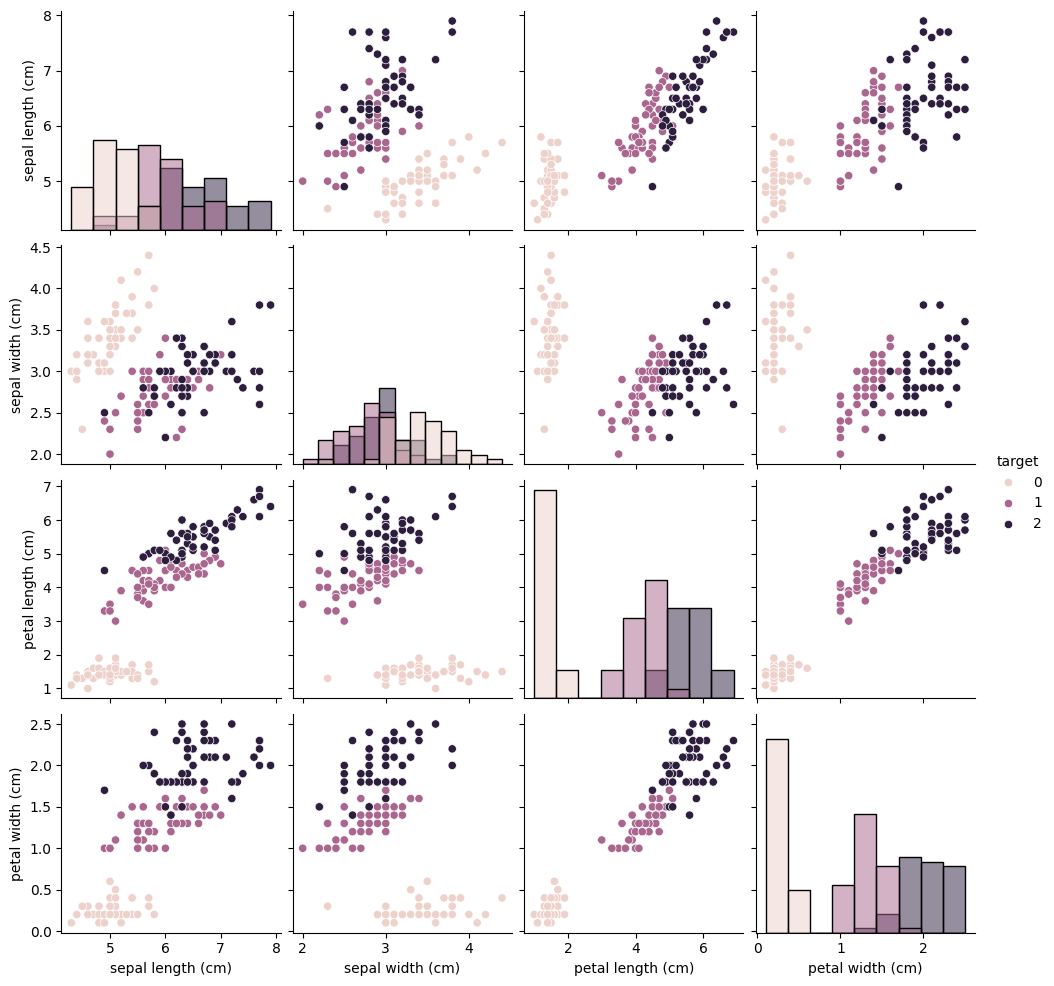

In [27]:
sns.pairplot(data=df, hue="target", diag_kind="hist")

In [28]:
X = df.drop('target', axis=1)
y = df['target']

In [29]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [30]:
# Create a KNN classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=2)

# Train the model
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=2)

In [31]:
# Make predictions on the testing set
y_pred = knn.predict(X_test)

print(y_pred)
print(y_test)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
22     0
15     0
65     1
11     0
42     0
146    2
51     1
27     0
Name: target, dtype: int64


In [33]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0
